Logistic Regression is a statistical method used for binary classification problems, where the outcome or target variable can take one of two possible values (e.g., yes/no, 0/1, true/false). Despite its name, logistic regression is used for classification tasks, not regression tasks.

## * Types of Logistic Regression

### 1. Binary Logistic Regression:

The categorical response has only two 2 possible outcomes. Example: Spam or Not

### 2. Multinomial Logistic Regression

Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)

### 3. Ordinal Logistic Regression

Three or more categories with ordering. Example: Movie rating from 1 to 5

## * Why Cost Function for Linear Regression Cannot Be Used for Logistic Regression?

In linear regression, we use the Mean Squared Error (MSE) as the cost function. However, this cost function is not suitable for logistic regression for the following reasons:

### 1. Non-Binary Outputs

The linear regression model can produce outputs that are not between 0 and 1, which is not suitable for a probability estimate.

### 2. Non-Convex Cost Function:

Using MSE in logistic regression would result in a non-convex cost function, which complicates the optimization process and makes it difficult to find the global minimum.

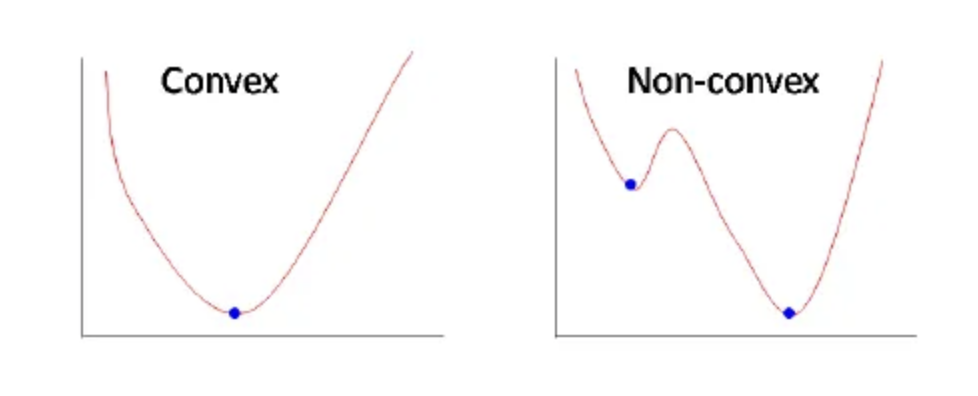

## * Sigmoid Function

The sigmoid function, also known as the logistic function, is used to map predicted values to probabilities. It squashes input values to a range between 0 and 1, making it suitable for binary classification.

The sigmoid function is defined as:

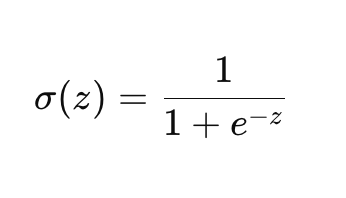

z is the input to the function, which is typically the linear combination of input features and model parameters.

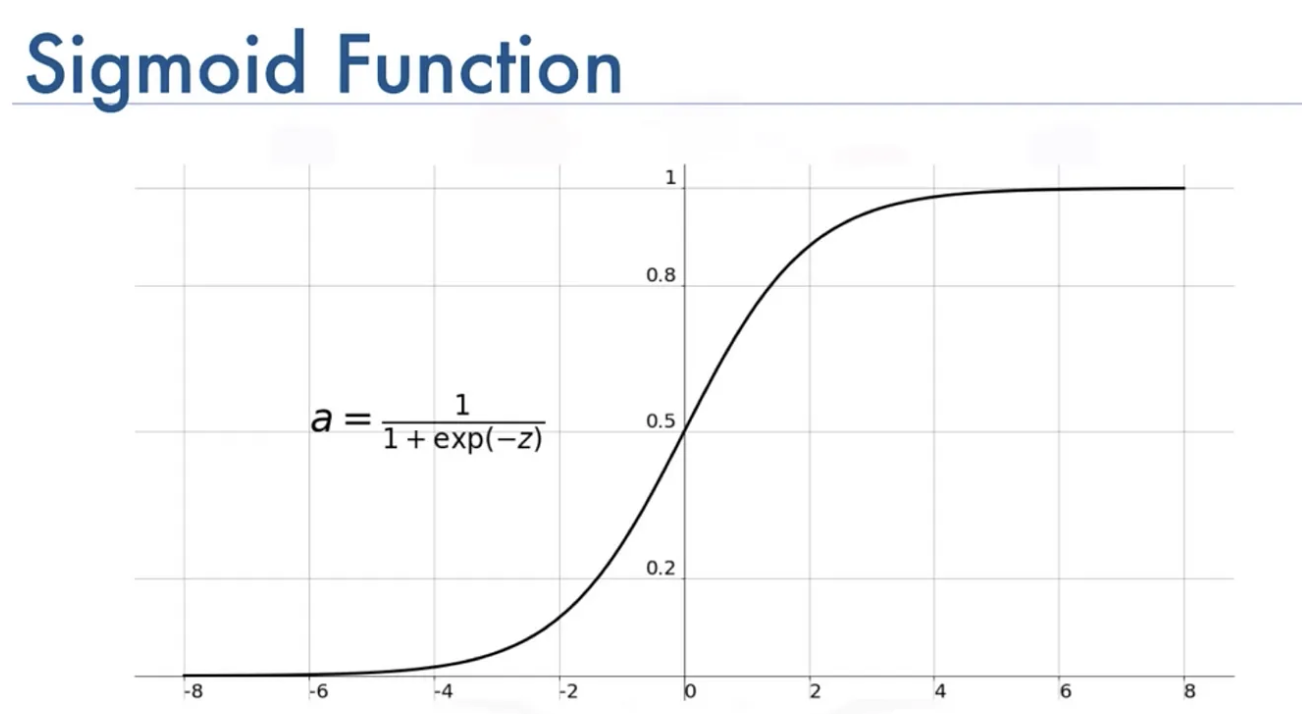

### How Sigmoid Function Works

1. Input Range: Takes any real-valued number as input.
2. Output Range: Maps the input to a value between 0 and 1.
3. Interpretation: The output can be interpreted as the probability of the input belonging to the positive class (e.g., class 1).

### Threshold

The threshold in the context of the sigmoid function is a value used to make binary classification decisions. The sigmoid function is often used in logistic regression and neural networks to output a probability value between 0 and 1. This probability can then be converted into a binary decision (e.g., class 0 or class 1) by applying a threshold.

### Threshold in Binary Classification

In binary classification, the output of the sigmoid function is interpreted as the probability of the positive class (class 1). To make a decision about which class an input belongs to, we compare the output probability to a threshold, typically 0.5.

* If σ(x)≥0.5: Classify the input as the positive class (class 1).
* If σ(x)<0.5: Classify the input as the negative class (class 0).

### Why 0.5?

The choice of 0.5 as the threshold is standard because it represents the point at which the predicted probability is equally likely to belong to either class. However, the threshold can be adjusted based on the specific requirements of the problem, such as the cost of false positives vs. false negatives, or to address class imbalance.

### Adjusting the Threshold

In some applications, it might be necessary to adjust the threshold to achieve a better balance between precision and recall, or to minimize specific types of classification errors. For example, in medical diagnosis, one might choose a lower threshold to ensure that fewer positive cases are missed (higher sensitivity).

## * Logistic Regression Cost Function (Log-Loss or Cross-Entropy Loss)

The cost function for logistic regression, called the log-loss or binary cross-entropy, is designed to measure the performance of a classification model whose output is a probability value between 0 and 1

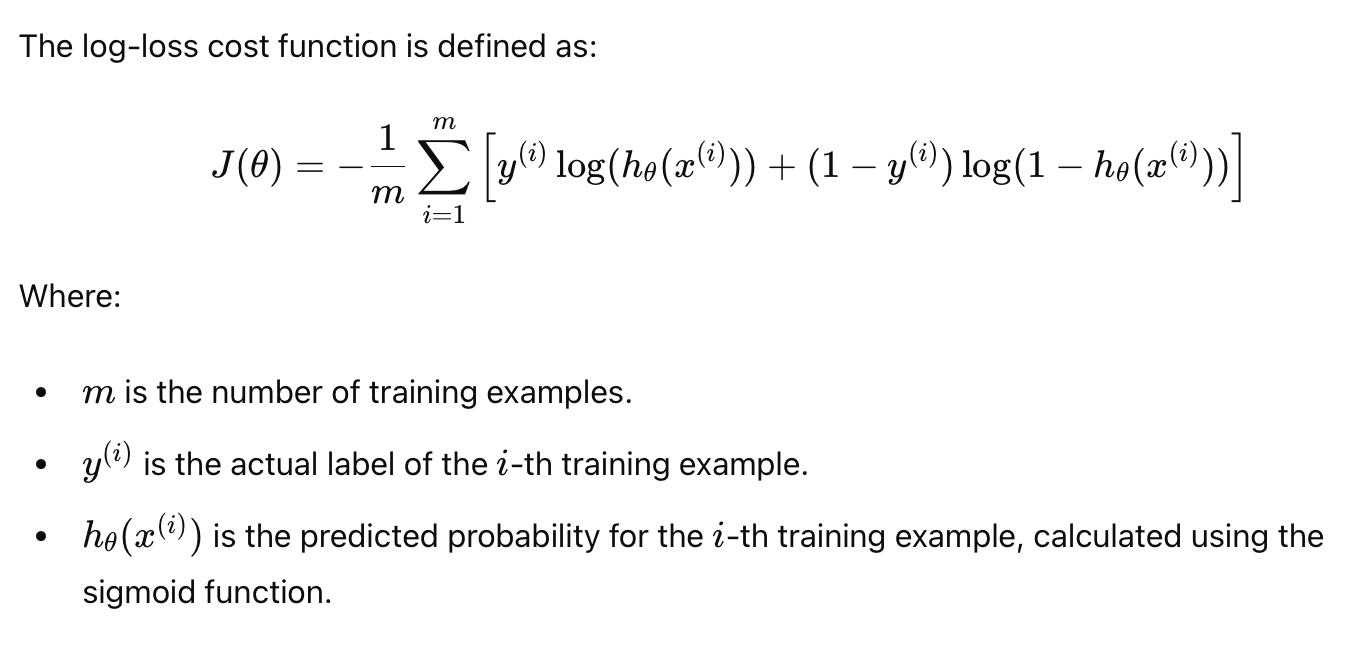

## * Evaluation Metrics for Logistic Regression Model

There are many evaluation metrics that can be used to assess the performance of a logistic regression model.
Some of the most common metrics include: 

1. Accuracy
2. Precision
3. Recall (Sensitivity)
4. F1-score
5. ROC-AUC Curve
6. Log-Loss

### Confusion Matrix

The confusion matrix is a tabular representation that summarises the performance of a classification model. It provides a detailed breakdown of the predicted and actual class labels. The confusion matrix for a binary classification problem consists of four cells:

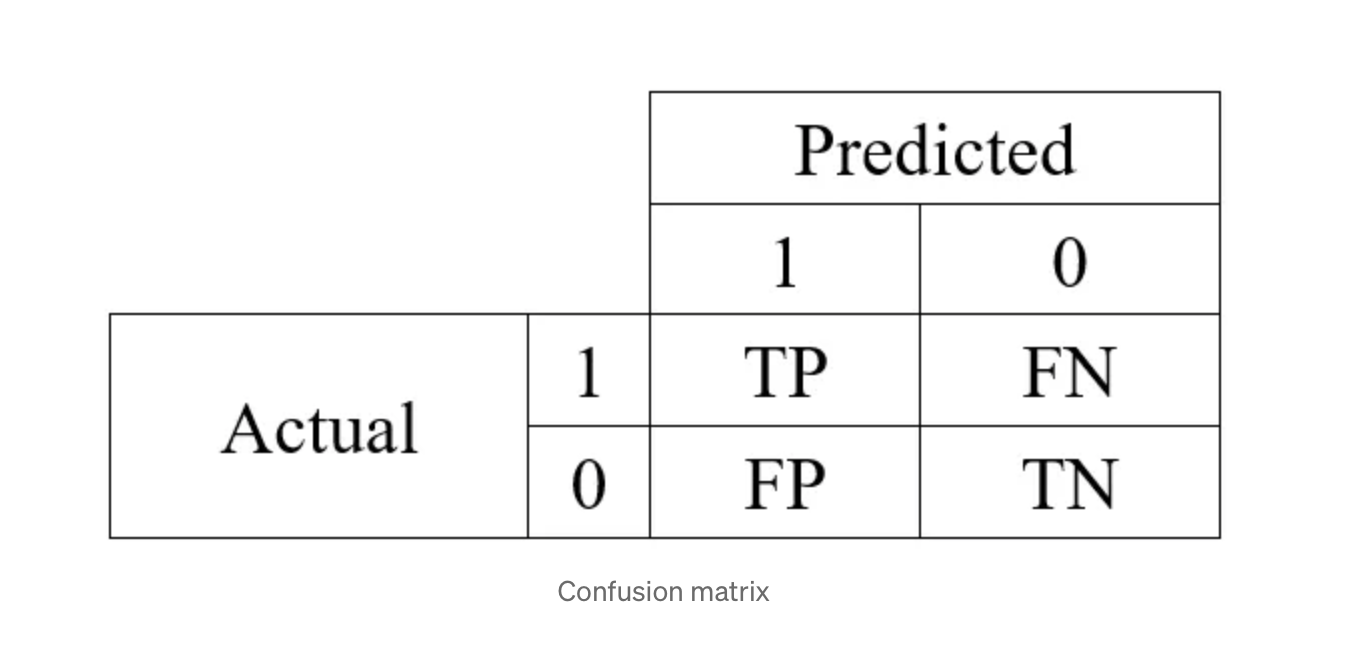

1. True Positive (TP): The model correctly predicted the positive class.
2. True Negative (TN): The model correctly predicted the negative class.
3. False Positive (FP): The model incorrectly predicted the positive class when the actual class was negative (Type I error).
4. False Negative (FN): The model incorrectly predicted the negative class when the actual class was positive (Type II error).

The confusion matrix helps evaluate the model’s performance by calculating various metrics:

#### 1. Accuracy:

The overall proportion of correct predictions, calculated as (TP + TN) / (TP + TN + FP + FN).

#### 2. Precision

The proportion of true positive predictions among all positive predictions, calculated as TP / (TP + FP).

#### 3. Recall (Sensitivity or True Positive Rate)

The proportion of true positive predictions among all actual positive instances, calculated as TP / (TP + FN).

#### 4. Specificity (True Negative Rate)

The proportion of true negative predictions among all actual negative instances, calculated as TN / (TN + FP).

#### 5. F1 Score

The harmonic mean of precision and recall, providing a balanced measure of model performance, calculated as 2 * (precision * recall) / (precision + recall).

#### 6. ROC-AUC Curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate = TP/TP+FN
* False Positive Rate = FP/FP+TN

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

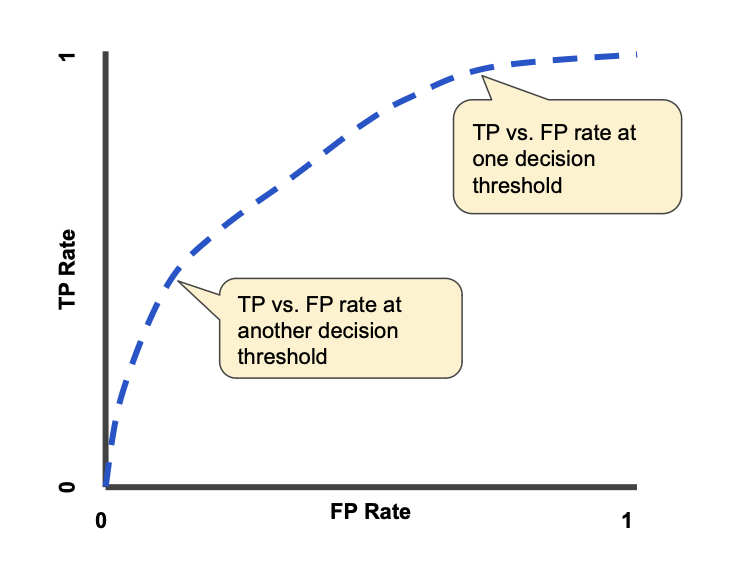

#### TP vs. FP rate at different classification thresholds.

To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.

#### AUC: Area Under the ROC Curve

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

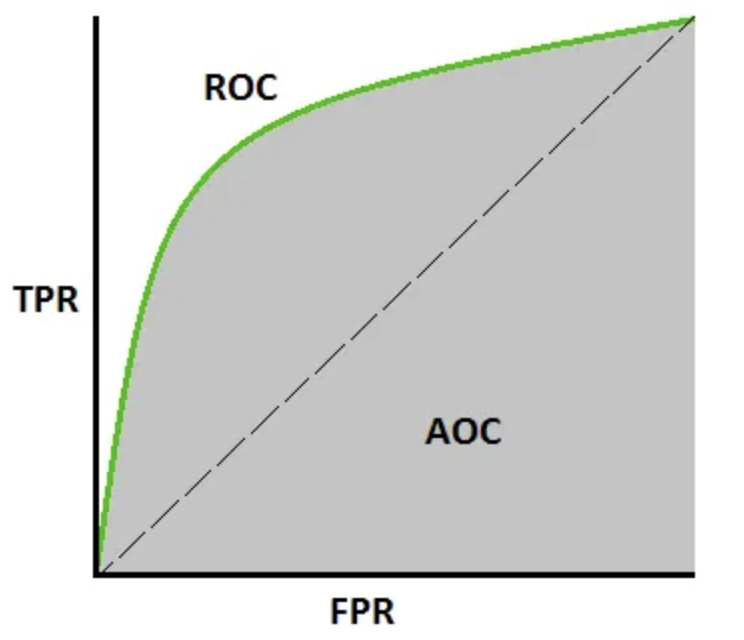

#### 7. Log-Loss

The log-loss cost function, which measures the performance of a classification model whose output is a probability value between 0 and 1.

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00
Log Loss: 0.06
Confusion Matrix:
[[ 8  0]
 [ 0 12]]


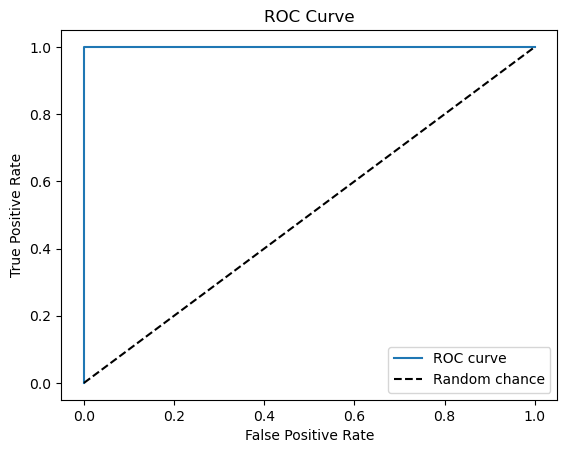

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss

# Generate some example data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Features
y = (X[:, 0] > 5).astype(int)     # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
logloss = log_loss(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Log Loss: {logloss:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()